In [ ]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data_frame = pd.read_csv("gdrive/My Drive/40.4.txt", delimiter="\t")

data_frame = data_frame.drop(axis = "columns", columns = "Year")
data_frame = data_frame.rename(columns={'Single Race 6': 'Race', 'Year Code' : 'Year' })
data_frame = data_frame[data_frame['Year'] != 2023]

In [ ]:
data_frame=data_frame.replace("Unreliable",np.nan)
data_frame[data_frame["Gender"] == "Female"]

,Notes,Gender,Gender Code,Year,Deaths,Population,Crude Rate
0,NaN,Female,F,2018.0,8807.0,1.660388e+08,5.3
1,NaN,Female,F,2019.0,10076.0,1.665822e+08,6.0
2,NaN,Female,F,2020.0,15250.0,1.672279e+08,9.1
3,NaN,Female,F,2021.0,19571.0,1.675090e+08,11.7
4,NaN,Female,F,2022.0,19979.0,1.680040e+08,11.9
6,Total,Female,F,NaN,86936.0,1.171370e+09,7.4


In [ ]:
CF2 = data_frame[(data_frame["Gender"] == "Female")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CM2 = data_frame[(data_frame["Gender"] == "Male")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CF = data_frame[(data_frame["Gender"] == "Female")&
           (data_frame["Notes"] != "Total")] [["Year", "Crude Rate"]].astype(float)
CM = data_frame[(data_frame["Gender"] == "Male")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)

In [ ]:
x1=CF2["Year"]
x1c=CF["Year"]
y1=CF2["Crude Rate"]

x2=CM2["Year"]
x2c=CM["Year"]
y2=CM2["Crude Rate"]

In [ ]:
yF = CF2["Crude Rate"]
xF = CF2["Year"]

In [ ]:
yM = CM2["Crude Rate"]
xM = CM2["Year"]

In [ ]:
xr=CM2["Year"]
yr=CM2["Crude Rate"].div(CF2["Crude Rate"].values)

In [ ]:
coeffF = np.polyfit(x1, y1, 2)
yfitF = np.polyval(coeffF,x1)
resF = np.sum((y1  - yfitF)**2)
coeffM = np.polyfit(x2, y2, 2)
yfitM = np.polyval(coeffM,x2)
resM = np.sum((y2  - yfitM)**2)

#stdF = np.sqrt(resF/5)
#stdM = np.sqrt(resM/5)

stdF = np.sqrt(resF/(len(y1)-3))
stdM = np.sqrt(resM/(len(y1)-3))

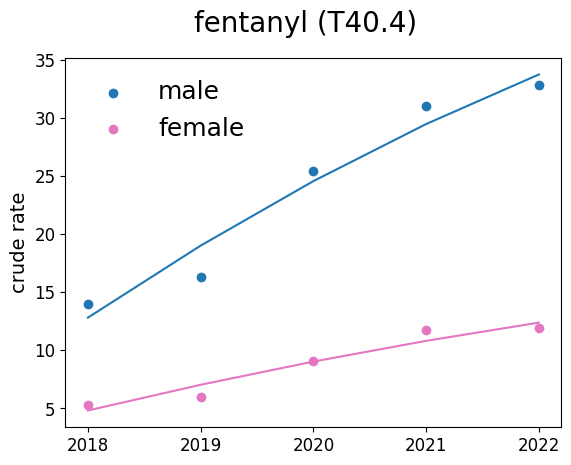

In [ ]:
plt.scatter(x2,y2, color='tab:blue')
plt.legend(["Crude Rate Females", "Crude Rate Males"])

plt.scatter(x1,y1, color='tab:pink')

plt.plot(x1c, np.polyval(coeffM,x1c), color='tab:blue')
plt.plot(x1c, np.polyval(coeffF,x1c), color='tab:pink')

plt.suptitle('fentanyl (T40.4)', fontsize=20)
#plt.xlabel("year", fontsize=14)
plt.ylabel("crude rate", fontsize=14)
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
plt.xticks(np.arange(2018, 2022.5, 1.0))
plt.legend(["male", "female"], frameon=False, fontsize=18)

#plt.savefig("AttemptT40.4_R.png")